In [1]:
! pip install gym==0.19.0 gym-retro==0.8.0

In [2]:
    !pip install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio===0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


### Imports and basic testing of installation

In [3]:
!pip install pygame==2.1.0

In [4]:
import retro # The main library
import time # For timing learning, if needed
import pygame # For rendering the game

pygame 2.1.0 (SDL 2.0.16, Python 3.6.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
retro.data.list_games()
# There are actually many games provided by Gym Retro: this command let's you check them out!

['1942-Nes',
 '1943-Nes',
 '3NinjasKickBack-Genesis',
 '8Eyes-Nes',
 'AaahhRealMonsters-Genesis',
 'AbadoxTheDeadlyInnerWar-Nes',
 'AcceleBrid-Snes',
 'ActRaiser2-Snes',
 'ActionPachio-Snes',
 'AddamsFamily-GameBoy',
 'AddamsFamily-Genesis',
 'AddamsFamily-Nes',
 'AddamsFamily-Sms',
 'AddamsFamily-Snes',
 'AddamsFamilyPugsleysScavengerHunt-Nes',
 'AddamsFamilyPugsleysScavengerHunt-Snes',
 'AdvancedBusterhawkGleylancer-Genesis',
 'Adventure-Atari2600',
 'AdventureIsland-GameBoy',
 'AdventureIsland3-Nes',
 'AdventureIslandII-Nes',
 'AdventuresOfBatmanAndRobin-Genesis',
 'AdventuresOfBayouBilly-Nes',
 'AdventuresOfDinoRiki-Nes',
 'AdventuresOfDrFranken-Snes',
 'AdventuresOfKidKleets-Snes',
 'AdventuresOfMightyMax-Genesis',
 'AdventuresOfMightyMax-Snes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Genesis',
 'AdventuresOfRockyAndBullwinkleAndFriends-Nes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Snes',
 'AdventuresOfStarSaver-GameBoy',
 'AdventuresOfYogiBear-Snes',
 'AeroFighters-Snes',
 

In [166]:
# Command to create your environment
env = retro.make(game = "StreetFighterIISpecialChampionEdition-Genesis")

In [167]:
# This is the basic loop to be run. Here the sampling is random.
# Watch this run carefully. Do you realise that finishing the first level barely requires any skill?
# The juicy victory won by smashing keys randomly is an incentive to bring in more players to the arcade!
# Reset game to starting state
obs = env.reset()
# Set flag to false
done = False
for game in range(1): 
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        
env.close()

### Your implementation

In [8]:
env.observation_space.sample()

array([[[ 72, 189,  86],
        [167, 211,  23],
        [  8, 130, 253],
        ...,
        [ 80, 111,  12],
        [107, 252, 140],
        [253, 162, 135]],

       [[ 15,  27,  46],
        [183, 172, 160],
        [204, 135,  93],
        ...,
        [ 41, 184, 101],
        [204, 171, 231],
        [228, 139,  79]],

       [[218, 144, 204],
        [ 54, 205,  94],
        [ 79, 192,  81],
        ...,
        [113,  53, 174],
        [224, 101, 220],
        [218, 253,  16]],

       ...,

       [[121, 253, 111],
        [172,  74, 217],
        [ 11, 242, 205],
        ...,
        [ 20, 240,   6],
        [191,   2, 213],
        [185,  93, 191]],

       [[ 97,  51, 246],
        [246,  69,  50],
        [232,  10,  48],
        ...,
        [ 66,  63,  96],
        [ 71, 180, 178],
        [ 78,  98, 247]],

       [[ 91, 210,  75],
        [150,  35, 160],
        [ 31,  35,  82],
        ...,
        [243, 169,  24],
        [194,  88, 104],
        [ 99,  59,  47]]

In [9]:
env.action_space.sample()

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int8)

In [10]:
!pip install opencv-python==4.5.5.62

In [11]:
!pip install matplotlib

In [12]:
from gym import Env 
from gym.spaces import MultiBinary, Box
import numpy as np 
import cv2
from matplotlib import pyplot as plt

### Preprocessing

In [13]:
# Create custom environment 
class StreetFighter(Env): 
    def __init__(self):
        super().__init__()
        self.observation_space = Box(low=0, high=255, shape=(84, 84, 1), dtype=np.uint8)
        self.action_space = MultiBinary(12)
        self.game = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis', use_restricted_actions=retro.Actions.FILTERED)
        
    def preprocess(self, observation): 
        gray = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (84,84),interpolation=cv2.INTER_CUBIC)
        channels = np.reshape(resize, (84,84,1))
        return channels 
    
    def step(self, action): 
        obs,reward,done,info = self.game.step(action)
        obs = self.preprocess(obs) 
        self.previous_frame = obs 
        reward = info['score'] - self.score 
        self.score = info['score'] 
        return obs, reward, done, info
        
    def reset(self):
        self.score = 0 
        obs = self.game.reset()
        obs = self.preprocess(obs) 
        self.previous_frame = obs 
        return obs

    def render(self, *args, **kwargs):
        self.game.render()

    def close(self):
        self.game.close()


In [15]:
env.close()
env=StreetFighter()

In [16]:
env.observation_space.shape

(84, 84, 1)

In [17]:
env.observation_space.sample()

array([[[254],
        [ 11],
        [  8],
        ...,
        [ 51],
        [218],
        [123]],

       [[ 54],
        [110],
        [230],
        ...,
        [157],
        [173],
        [ 75]],

       [[228],
        [ 78],
        [223],
        ...,
        [ 27],
        [108],
        [ 11]],

       ...,

       [[ 56],
        [ 46],
        [200],
        ...,
        [178],
        [108],
        [105]],

       [[234],
        [ 36],
        [179],
        ...,
        [191],
        [107],
        [221]],

       [[176],
        [229],
        [ 96],
        ...,
        [222],
        [218],
        [134]]], dtype=uint8)

In [18]:
print(env.action_space.sample())
env.action_space.shape

[0 0 1 1 0 1 0 0 1 0 1 1]


(12,)

In [19]:
obs = env.reset()
# Set flag to false
done = False
for game in range(1): 
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        
env.close()

In [25]:
env=StreetFighter()
obs=env.reset()

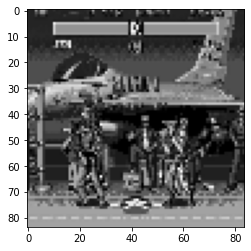

In [40]:
obs, reward, done, info = env.step(env.action_space.sample())
plt.imshow(cv2.cvtColor(obs,cv2.COLOR_BGR2RGB))

### Hyperparameter Tuning

In [41]:
!pip install stable-baselines3[extra] optuna

  Using cached stable_baselines3-1.3.0-py3-none-any.whl (174 kB)
  Using cached optuna-3.0.6-py3-none-any.whl (348 kB)
  Using cached pandas-1.1.5-cp36-cp36m-win_amd64.whl (8.7 MB)
  Using cached atari_py-0.2.9-cp36-cp36m-win_amd64.whl (1.6 MB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached cmaes-0.9.0-py3-none-any.whl (23 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached cliff-3.10.1-py3-none-any.whl (81 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Using cached alembic-1.7.7-py3-none-any.whl (210 kB)
  Using cached importlib_resources-5.4.0-py3-none-any.whl (28 kB)
  Using cached Mako-1.1.6-py2.py3-none-any.whl (75 kB)
  Using cached greenlet-2.0.2-cp36-cp36m-win_amd64.whl (197 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached Markdown-3.3.7-py3-none-any.whl (97 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-a

In [93]:
import optuna
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
import os

In [94]:
LOG_DIR = './logs/'
OPT_DIR = './opt/'
os.makedirs(LOG_DIR, exist_ok=True)
os.makedirs(OPT_DIR, exist_ok=True)

In [95]:
def objective(trial):
    return {
        'n_steps': trial.suggest_int('n_steps', 2048, 8192),
        'gamma': trial.suggest_loguniform('gamma', 0.8, 0.9999),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
        'clip_range': trial.suggest_uniform('clip_range', 0.1, 0.4),
        'gae_lambda': trial.suggest_uniform('gae_lambda', 0.8, .99)
    }

In [96]:
def optimize_agent(trial):
    try:
        model_params = objective(trial)
        env = StreetFighter()
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda: env])
        env = VecFrameStack(env, 4, channels_order='last')
        model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        model.learn(total_timesteps=30000)
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
        env.close()

        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)
        
        return mean_reward
    except Exception as e: 
        return -1000

In [97]:
env.close()
del env

NameError: name 'env' is not defined

In [98]:
study = optuna.create_study(direction='maximize')
study.optimize(optimize_agent, n_trials=10, n_jobs=1)

[I 2023-08-06 16:33:47,395] A new study created in memory with name: no-name-5303ccd8-9d95-4725-8c21-d8ad4b0fa602
D:\Anaconda\envs\StreetFighter\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  after removing the cwd from sys.path.
D:\Anaconda\envs\StreetFighter\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  """
D:\Anaconda\envs\StreetFighter\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.tri

[I 2023-08-06 18:18:10,934] Trial 9 finished with value: 2000.0 and parameters: {'n_steps': 4674, 'gamma': 0.804101505983249, 'learning_rate': 4.179220064297628e-05, 'clip_range': 0.15040014575344252, 'gae_lambda': 0.8263188389304869}. Best is trial 0 with value: 2000.0.


In [99]:
study.best_params

{'n_steps': 2894,
 'gamma': 0.9687159987695488,
 'learning_rate': 9.805041392441808e-05,
 'clip_range': 0.1741531430893773,
 'gae_lambda': 0.9144511891922987}

In [100]:
study.best_trial

FrozenTrial(number=0, values=[2000.0], datetime_start=datetime.datetime(2023, 8, 6, 16, 33, 47, 470706), datetime_complete=datetime.datetime(2023, 8, 6, 16, 51, 27, 482709), params={'n_steps': 2894, 'gamma': 0.9687159987695488, 'learning_rate': 9.805041392441808e-05, 'clip_range': 0.1741531430893773, 'gae_lambda': 0.9144511891922987}, distributions={'n_steps': IntDistribution(high=8192, log=False, low=2048, step=1), 'gamma': FloatDistribution(high=0.9999, log=True, low=0.8, step=None), 'learning_rate': FloatDistribution(high=0.0001, log=True, low=1e-05, step=None), 'clip_range': FloatDistribution(high=0.4, log=False, low=0.1, step=None), 'gae_lambda': FloatDistribution(high=0.99, log=False, low=0.8, step=None)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)

### Callback

In [110]:
from stable_baselines3.common.callbacks import BaseCallback

In [111]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [114]:
# CHECKPOINT_DIR = './train/'
os.makedirs('./train/', exist_ok=True)
callback = TrainAndLoggingCallback(check_freq=10000, save_path='./train/')
env.close()

### Train Model

In [154]:
env = StreetFighter()
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [155]:
model_params = study.best_params

In [156]:
model_params

{'n_steps': 2894,
 'gamma': 0.9687159987695488,
 'learning_rate': 9.805041392441808e-05,
 'clip_range': 0.1741531430893773,
 'gae_lambda': 0.9144511891922987}

In [157]:
model_params['n_steps'] = 45*64
model_params['learning_rate']=5e-7

In [158]:
env.reset()
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
# model=PPO.load(os.path.join(OPT_DIR,'trial_0_best_model.zip'))
model.learn(total_timesteps=100000,callback=callback)
env.close()

### Evaluate Model

In [161]:
env = StreetFighter()
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [162]:
model = PPO.load('./train/best_model_50000')
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=2, render=True)

In [165]:
mean_reward

1000.0

In [164]:
env.close()